In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from correlation import decode_temporal_graphs
import zipfile

In [26]:
source_node_order = ['carts', 'user', 'user-db', 'catalogue', 'catalogue-db', 'orders-db', 'carts-db', 'queue-master', 'rabbitmq', 'session-db', 'master', 'worker1', 'worker2', 'front-end', 'orders', 'shipping', 'payment']
target_node_order = ['carts', 'carts-db', 'catalogue', 'catalogue-db', 'front-end', 'orders', 'orders-db', 'payment', 'queue-master', 'rabbitmq', 'session-db', 'shipping', 'user', 'user-db', 'worker1', 'worker2', 'master']
target_node_order_as_source_permutation = [source_node_order.index(node) for node in target_node_order]

In [10]:
source_graphs = decode_temporal_graphs(np.load("/Users/max/Code/hpi/Machine-Learning-on-Spatio-Temporal-Graphs/Spatio-Temporal-Graphs/data/apg_unique_subgraphs_temporal_node2-17.npy"))
target_graphs = np.load("/Users/max/Code/hpi/Machine-Learning-on-Spatio-Temporal-Graphs/Spatio-Temporal-Graphs/src/artificial-graph-generation/generated/100k_frontend_graphs_temporal_unique.npy")

In [11]:
num_edges_per_source_graph = np.array(list(map(lambda x: x.number_of_edges(), source_graphs)), dtype=np.uint8)
num_edges_per_target_graph = np.array([loaded[:,:,-1].sum() for loaded in target_graphs], dtype=np.uint8)
np.save("source_graph_num_edges.npy", num_edges_per_source_graph)
np.save("target_graph_num_edges.npy", num_edges_per_target_graph)

In [13]:
temporal_betweenness_vectors_sources = np.load('../data/temporal_betweenness_vectors_overtime.npy')[:,target_node_order_as_source_permutation]
temporal_closeness_vectors_sources = np.load('../data/temporal_closeness_vectors_overtime.npy')[:,target_node_order_as_source_permutation]
temporal_degree_vectors_sources = np.load('../data/temporal_degree_vectors_overtime.npy')[:,target_node_order_as_source_permutation]

In [14]:
temporal_betweenness_vectors_targets = np.load('artificial-graph-generation/generated/temporal_betweennesses_unique.npy')
temporal_closeness_vectors_targets = np.load('artificial-graph-generation/generated/temporal_closenesses_unique.npy')
temporal_degree_vectors_targets = np.load('artificial-graph-generation/generated/temporal_degrees_unique.npy')

In [30]:
import networkx as nx

In [31]:
g = nx.DiGraph()

In [33]:
g = nx.DiGraph()
g.add_edge("Front-End", "Catalogue")
g.add_edge("Front-End", "Session-DB")
g.add_edge("Catalogue", "Catalogue-DB")
g.add_edge("Catalogue", "Cart")
g.add_edge("Cart", "Cart-DB")

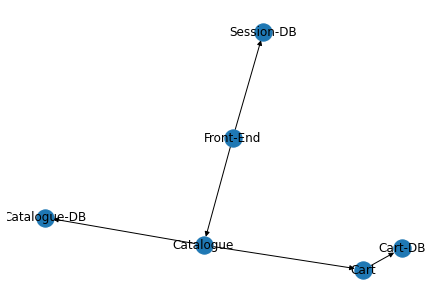

In [39]:
nx.draw_spring(g, with_labels = True)

In [40]:
nx.centrality.betweenness_centrality(g)

{'Front-End': 0.0,
 'Catalogue': 0.15000000000000002,
 'Session-DB': 0.0,
 'Catalogue-DB': 0.0,
 'Cart': 0.1,
 'Cart-DB': 0.0}

In [41]:
nx.centrality.closeness_centrality(g.reverse())


{'Front-End': 0.5555555555555556,
 'Catalogue': 0.44999999999999996,
 'Session-DB': 0.0,
 'Catalogue-DB': 0.0,
 'Cart': 0.2,
 'Cart-DB': 0.0}

In [36]:
nx.centrality.degree_centrality(g)

{'Front-End': 0.4,
 'Catalogue': 0.6000000000000001,
 'Session-DB': 0.2,
 'Catalogue-DB': 0.2,
 'Cart': 0.4,
 'Cart-DB': 0.2}